# Modelleringsoppgave våren 2019 av Gjermund og Marie

# Oppgave 3: Kloss i fjær




Hensikten med denne oppgaven er å se nærmere på svingningen til en kloss som henger i en fjær. Vi skal se hvordan forskjellige fjærkonstanter og konstanter for luftmotstanden påvirker akselrasjonen, farten og posisjonen, samt hvor god modellen er for virkeligheten.


## 1: Skisse av systemet

![Image](promod.png)


Vi definerer positiv retning som nedover, og negativ retning som oppover. Dermed vil luftmotstanden virke negativt når klossen beveger seg i negativ retning, og i positivt når klossen beveger seg i positiv retning. Fjærkraften vil kun virke i negtiv retning uavhening av posisjonen til klossen.


## 2: Numerisk modell

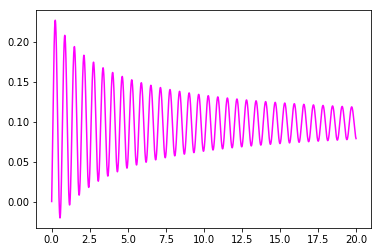

In [21]:
from pylab import*

#Differensiallikninger
#Newtons 2.lov

#Tid og steg
N=100000
t0=0
t_slutt=20
dt=(t_slutt-t0)/N

#Konstanter
m=1.0     #Masse i kg
k_f=100   #Fjærkonstant i N/m
g=9.81    #Tyngdeakselerasjon i m/s^2
k_l=-0.5  #Friksjonskonstanten(luftmotstand)

#Matriser
v=zeros(N)
a=zeros(N)
s=zeros(N)
t=zeros(N)

#Initalbetningelser
v[0]=1.0  #Startfart i m/s
s[0]=0    #Startposisjon i meter
t[0]=t0   #Starttid i sek


#Euler-Cromers metode
for i in range(N-1):
   if v[i]>0:
       a[i]=g-((-k_l*v[i]**2)+(k_f*s[i]))/m
   else:
       a[i]=g-((k_l*v[i]**2)+(k_f*s[i]))/m
   v[i+1]=v[i]+a[i]*dt
   s[i+1]=s[i]+v[i+1]*dt
   t[i+1]=t[i]+dt

#Plotting
plot(t, s,color="magenta")

    

Programmet består av utvalgte tid og steg (tilpasset oppgaven som skal løses), en rekke med konstanter oppgitt i oppgaven, matriser for å kunne plotte, initialbetingelser, Euler-Cromers metode og tilslutt plottet som gir en funksjon av posisjonen til klossen i et tidsrom på 20 sekunder. Startposisjonen er satt til null (likevektspunktet), starttid er 0 sekunder og tidsrommet har vi valgt er 20 sekunder, i og med at man da ser tydelig om svingningen er dempet eller harmonisk, samt se forskjell på grafene med kun økning av en variabel eller fler. 

Innad i Euler-Cromers metode er det en if/else komando, som endrer fortegnet til luftmotstanden, slik at den virker negativt når klossen går i positiv retning, og virker positivt når klossen går i negativ rentning. 

Metoden som er brukt, Euler-Cromers metode er en "oppdatert" versjon av den klassiske Eulers-metoden, for å løse differensiallikninger numerisk. Forskjellen mellom dem er at når Euler-metoden i andre steg regner på s[i+1] ved å se tilbake på v[i], ser Euler-Cromers metoden tilbake på v[i+1].

## 3: Konstantvariering av k_f og k_l

Til denne oppgaven har vi valgt å variere verdiene til k_f og k_l systematisk, og sette det opp i en tabell, sammen med bilde av grafen. Alle grafene viser posisjonen i et tidsrom på 20 sekunder. 

Tabell, samt videre kommentarer og sammenligninger ligger i vedlegget.

## 4: Modell i praksis

![image](forsøk sinus 2.png)


Klossen vi brukte veide ca 0,20 kg og fjæren vi brukte målte vi til en kraft på 8 N/m. Vidre brukte vi capstone til å måle posisjonen til klossen med en sensor. Vi har valgt å glatte ut grafen for å tydligere se svingningene, og siden resultatene ble dårligere enn forventet, og vanskligere å tolke. På den utgattede grafen kan man på en annen side tydelig se svingningene, som tyder på å dempes mot slutten av tidsrommet vi ser på. Dette er lovende når det kommer til om modellen funker i praksis/virkeligheten. 

![image](forsøk sinus 1.jpg)


Den utglattede funksjonen er en dempet sinusregresjon, med en linjær regersjon som i teorien skulle vært konstant og vist likevektslinjen. Vi antar at fjærstivheten er konstant i utslagene vi regner med. For å regne ut friksjonkoeffisienten kan man plotte funksjonen sammen med en dempet sinusfunksjon, hvor man kan variere friksjonskoeffisienten slik at grafene treffer relativt godt. Vi prøvde å bruke rådataen med punktene og plotte det sammen med en harmonisk svingning (med lik masse og fjærkonstant) men konkluderte med at rådataen var for unøyaktig,og vi klarte ikke få ut noe verdi for friksjonskraften. Under er et plot med både rådataen fra forsøket i praksis og sinusfunksjon av forsøket (harmonisk svingning med samme verdier for masse og fjærstivhet), uten luftmotstand.

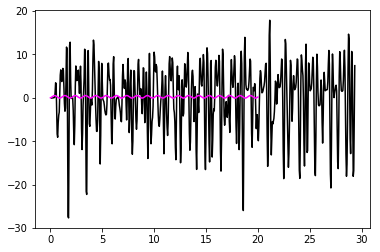

In [3]:
from pylab import *
import pandas as pd


#Importering og plotting av rådata fra forsøket i praksis


fil= open("data-fjær-i-kloss.txt", "r")    #åpner .txt dokumentet med rådataen
t=[]                                       #Legger dataen inn i lister, slik at vi kan plotte grafen
s=[]

for rad in fil:
    data=rad.split()
    t.append(float(data[0]))
    s.append(float(data[1]))
    
plot(t,s, color="black")                   #Plotter grafen i samme koordinantfelt som differensiallikningen


#Differensiallikninger
#Newtons 2.lov

#Tid og steg
N=100000
t0=0
t_slutt=20
dt=(t_slutt-t0)/N

#Konstanter
m=0.2    #Masse i kg
k_f=8 #Fjærkonstant i N/m
g=9.81    #Tyngdeakselerasjon i m/s^2
k_l=-0  #Friksjonskonstanten(luftmotstand)

#Matriser
v=zeros(N)
a=zeros(N)
s=zeros(N)
t=zeros(N)

#Initalbetningelser
v[0]=1.0  #Startfart i m/s
s[0]=0    #Startposisjon i meter
t[0]=t0   #Starttid i sek


#Eulers-Cromers metode
for i in range(N-1):
   if v[i]>0:
       a[i]=g-((-k_l*v[i]**2)+(k_f*s[i]))/m
   else:
       a[i]=g-((k_l*v[i]**2)+(k_f*s[i]))/m
   v[i+1]=v[i]+a[i]*dt
   s[i+1]=s[i]+v[i+1]*dt
   t[i+1]=t[i]+dt

#Plotting
plot(t, s,color="magenta")

Forsøket i praktisk kan/har mange feilkilder. Under målingene av posisjon, holdt vi fjæren med hendene, uten å støtte armen på noe, som mest sannsynlig har påvirket resultatene en god del. Sensoren kan også ha plukket opp støy i rommet, f.eks. hånden til personen som holdt fjæren. Unøyaktighet i måling av fjærkonstanten og masse på klossen, sammenlagt med at fjærkonstanten i virkeligheten ikke er konstant i helle spennet til fjæren, kan ha påvirket resultatene noe. 
 
 
For å konkludere vil vi si at modellen er en nokså god framstilling av virkeligeheten, og at det er en grunn til at vi bruker denne modellen i fysikk. Desverre er det også mange mulige feilkilder når det kommer til praktisering og målinger ved bruk av modellen. Alt i alt har porjektet gitt oss et større innblikk i hvorfor modellen er som den er og hvorfor newtons andre lov er en difflikning, samt hvordan løse en difflikning nummerisk ved hjelp av Euler-Cromers metode.